# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached numpy-1.24.3.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "C:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "C:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\si

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

---

###  **1.1. Problem Statement**

This project investigates the relationship between social media usage and mental health. We aim to explore how time spent on different social media platforms correlates with self-reported mental health indicators such as anxiety, depression, sleep quality, and focus levels.
We will wrangle and analyze two datasets:

1. A structured dataset containing 513 records and 33 features about individuals’ social media behavior and mental health metrics.
2. Google Trends data retrieved via API to examine search interest over time in mental health-related terms such as “anxiety” and “depression.”

---

### **1.2.** Gather at least two datasets using two different data gathering methods

#### **Dataset 1**

* **Type:** *CSV File*

* **Method:** The data was gathered using the **manual downloading** method from [Kaggle](https://www.kaggle.com/datasets/yashgajera/social-media-and-mental-health-dataset). It contains survey responses related to social media usage and mental health indicators.

* **Dataset variables:**

  * `Time_Spent_on_Social_Media`: Number of hours the respondent spends daily on social media.
  * `Anxiety`: A self-reported indicator of whether the respondent experiences anxiety (Yes/No).
  * `Depression`: A self-reported indicator of whether the respondent experiences depression (Yes/No).
  * `Sleep_Quality`: Indicates how well the respondent sleeps (on a scale).
  * `Focus_Problem`: Shows whether the respondent experiences problems focusing.

---

In [16]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv('row_data/cleaned_data-2.csv')

df1.head()

,profession,social_media_sleep,mood_disorder,content_type_social_media,think_time_instagram,think_time_whatsapp,think_time_twitter,think_time_facebook,think_time_youtube,think_time_linkedin,...,sleep_quality_general,refreshed_after_social_media,anxious_stressed,compare_with_others,headaches_eyestrain,trouble_sleeping_month,sleep_quality_month,social_media_before_bed,nervous_anxious,smartphone_discomfort
0,0,3,4,10,1,2,4,4,2,2,...,4,0,0,3,1,1,3,1,1,3
1,0,4,3,10,2,1,4,2,2,2,...,4,0,0,3,1,1,3,1,1,3
2,0,3,3,16,0,0,4,4,0,0,...,4,0,0,3,1,1,3,1,1,3
3,0,1,2,27,1,2,4,4,2,2,...,4,0,0,3,1,1,3,1,1,3
4,0,3,3,12,2,4,4,4,1,1,...,4,0,0,3,1,1,3,1,1,3


### Dataset 2

* **Type:** JSON (converted to DataFrame)
* **Method:** The data was gathered **programmatically using an API** from Google Trends via the `pytrends` Python library. This method allows real-time extraction of the relative search interest over time for specific terms such as “depression,” “anxiety,” and “social media.” This approach provides valuable insights into public interest and awareness around mental health topics over time.
* **Dataset variables:**

  * `date`: The time period (weekly or monthly).
  * `depression`: Relative search interest for the keyword “depression”.
  * `anxiety`: Relative search interest for the keyword “anxiety”.
  * `social media`: Relative search interest for the keyword “social media”.

---

In [26]:
from pytrends.request import TrendReq
import pandas as pd
import os

# Create the output directory if it doesn't exist
os.makedirs("row_data", exist_ok=True)

# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Keywords to search for
keywords = ["depression", "anxiety", "social media"]

# Define time ranges (split by 6 months)
timeframes = [
    '2020-01-01 2020-06-30', '2020-07-01 2020-12-31',
    '2021-01-01 2021-06-30', '2021-07-01 2021-12-31',
    '2022-01-01 2022-06-30', '2022-07-01 2022-12-31',
    '2023-01-01 2023-06-30', '2023-07-01 2023-12-31',
    '2024-01-01 2024-06-30', '2024-07-01 2024-12-31',
    '2025-01-01 2025-06-30', '2025-07-01 2025-12-31'
]

# Initialize df2 to collect all data
df2 = pd.DataFrame()

# Loop through each timeframe
for timeframe in timeframes:
    pytrends.build_payload(keywords, cat=0, timeframe=timeframe, geo='', gprop='')
    temp_data = pytrends.interest_over_time()

    # Drop 'isPartial' column if it exists
    if 'isPartial' in temp_data.columns:
        temp_data = temp_data.drop(columns=['isPartial'])

    # Append to df2
    df2 = pd.concat([df2, temp_data])

# Reset index and save
df2.reset_index(inplace=True)
df2.to_csv("row_data/trends_data_final.csv", index=False)

# Output the row count
print(f" Collected {len(df2)} rows.")


 Collected 2021 rows.


c:\Users\janaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Data Quality Issue 1: Missing values in key variables

In [43]:
# Count and display missing values per column in Dataset 1
print("Missing Values in Dataset 1 (Social Media & Mental Health):")
print(df1.isnull().sum().sort_values(ascending=False))
print("\n" + "="*60 + "\n")

# Count and display missing values per column in Dataset 2
print("Missing Values in Dataset 2 (Google Trends):")
print(df2.isnull().sum().sort_values(ascending=False))

Missing Values in Dataset 1 (Social Media & Mental Health):
profession                      0
social_media_sleep              0
mood_disorder                   0
content_type_social_media       0
think_time_instagram            0
think_time_whatsapp             0
think_time_twitter              0
think_time_facebook             0
think_time_youtube              0
think_time_linkedin             0
actual_time_instagram           0
actual_time_whatsapp            0
actual_time_twitter             0
actual_time_facebook            0
actual_time_youtube             0
actual_time_linkedin            0
focus_quality                   0
binge_watch_reels               0
sad_content_feed                0
social_media_purpose            0
social_relationship_impact      0
time_loss_social_media          0
sleep_quality_general           0
refreshed_after_social_media    0
anxious_stressed                0
compare_with_others             0
headaches_eyestrain             0
trouble_sleeping_month

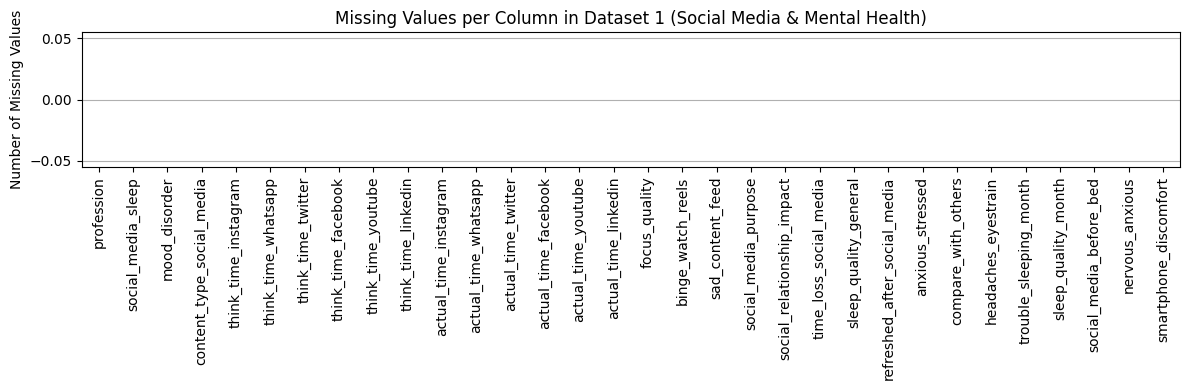

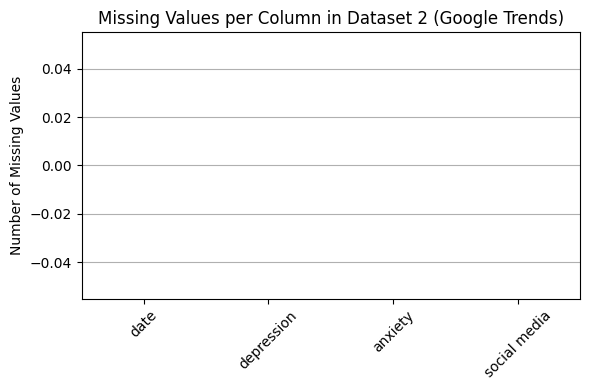

In [30]:
import matplotlib.pyplot as plt

# Visual inspection for Dataset 1
plt.figure(figsize=(12, 4))
df1.isnull().sum().plot(kind='bar')
plt.title('Missing Values per Column in Dataset 1 (Social Media & Mental Health)')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Visual inspection for Dataset 2
plt.figure(figsize=(6, 4))
df2.isnull().sum().plot(kind='bar', color='orange')
plt.title('Missing Values per Column in Dataset 2 (Google Trends)')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


---

###  Data Quality Issue 1: Incorrect Data Type in Key Variable

**Issue:**
In Dataset 2 (Google Trends), the `date` column is stored as an object (string) instead of a proper datetime format.

**Justification:**
Storing the date as a string prevents efficient time-based operations such as filtering, sorting, or time-series plotting. This violates the quality principle of **accuracy**, as the data type does not reflect the true nature of the variable.

---

### Quality Issue 2: Potential Outliers in Numerical Features

In [31]:
# For df1 (social media survey) — check numeric columns
df1.describe()

# For df2 (Google Trends)
df2.describe()

,date,depression,anxiety,social media
count,2021,2021.000000,2021.000000,2021.000000
mean,2022-10-07 00:00:00,54.408709,68.149431,51.230084
min,2020-01-01 00:00:00,19.000000,26.000000,15.000000
25%,2021-05-20 00:00:00,43.000000,51.000000,36.000000
50%,2022-10-07 00:00:00,55.000000,72.000000,52.000000
75%,2024-02-24 00:00:00,66.000000,85.000000,66.000000
max,2025-07-13 00:00:00,100.000000,100.000000,100.000000
std,NaN,15.683131,19.306143,18.253279


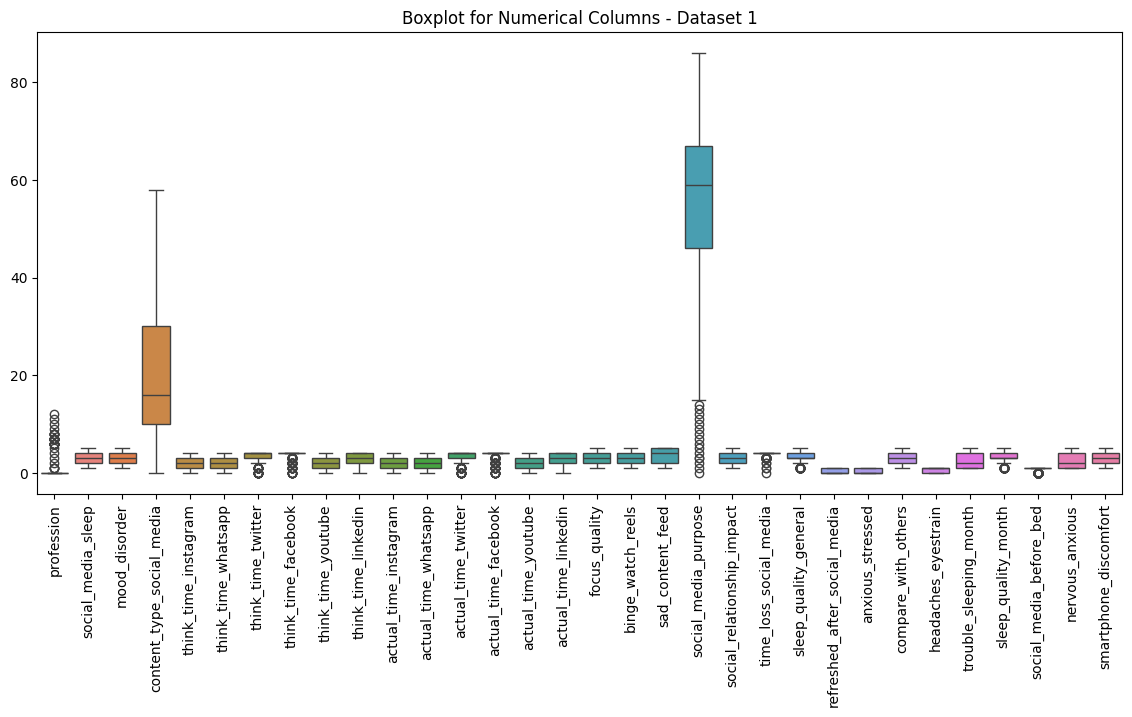

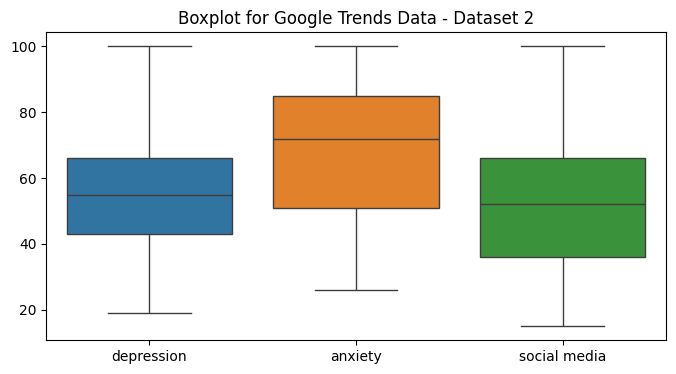

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 1 - boxplot for numeric columns
plt.figure(figsize=(14, 6))
sns.boxplot(data=df1.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Boxplot for Numerical Columns - Dataset 1")
plt.show()

# Dataset 2 - boxplot for Google Trends
plt.figure(figsize=(8, 4))
sns.boxplot(data=df2[['depression', 'anxiety', 'social media']])
plt.title("Boxplot for Google Trends Data - Dataset 2")
plt.show()


---

####  **Programmatic Assessment:**

We used **boxplots** to visually inspect the distribution of values across numerical columns. This is a common method for detecting **outliers**, as any points outside the whiskers (especially beyond 1.5×IQR) are considered potential outliers.

####  **Dataset 1 (Social Media & Mental Health):**

Some variables such as:

* `social_media_purpose`
* `content_type_social_media`
* `profession`

show unusually high values compared to the rest of the data, suggesting possible data entry errors or values that may need normalization or transformation.

Example:

In [33]:
df1[['profession', 'content_type_social_media']].describe()

,profession,content_type_social_media
count,513.000000,513.000000
mean,0.625731,20.832359
std,2.031077,13.171168
min,0.000000,0.000000
25%,0.000000,10.000000
50%,0.000000,16.000000
75%,0.000000,30.000000
max,12.000000,58.000000


---

#### **Dataset 2 (Google Trends):**

The values for:

* `depression`
* `anxiety`
* `social media`

range between 0 and 100 as expected (since Google Trends uses a scale of 0–100).
However, the **boxplot** reveals a concentration of values around the upper bound (close to 100), which can affect normalization or regression if not treated carefully.

Example:


In [34]:
df2[['depression', 'anxiety', 'social media']].describe()

,depression,anxiety,social media
count,2021.000000,2021.000000,2021.000000
mean,54.408709,68.149431,51.230084
std,15.683131,19.306143,18.253279
min,19.000000,26.000000,15.000000
25%,43.000000,51.000000,36.000000
50%,55.000000,72.000000,52.000000
75%,66.000000,85.000000,66.000000
max,100.000000,100.000000,100.000000


---
####  **Issue Summary:**

* **Issue**: Outliers detected in both datasets.
* **Justification**: Visual inspection via **boxplots** shows extreme values, which may distort analysis or model training.
* **Next Step**: Consider using **winsorization**, **log transformation**, or **removal** based on context and variable importance.

### Tidiness Issue 1:

In [36]:
# Inspecting the dataframe visually
df1.head()

,profession,social_media_sleep,mood_disorder,content_type_social_media,think_time_instagram,think_time_whatsapp,think_time_twitter,think_time_facebook,think_time_youtube,think_time_linkedin,...,sleep_quality_general,refreshed_after_social_media,anxious_stressed,compare_with_others,headaches_eyestrain,trouble_sleeping_month,sleep_quality_month,social_media_before_bed,nervous_anxious,smartphone_discomfort
0,0,3,4,10,1,2,4,4,2,2,...,4,0,0,3,1,1,3,1,1,3
1,0,4,3,10,2,1,4,2,2,2,...,4,0,0,3,1,1,3,1,1,3
2,0,3,3,16,0,0,4,4,0,0,...,4,0,0,3,1,1,3,1,1,3
3,0,1,2,27,1,2,4,4,2,2,...,4,0,0,3,1,1,3,1,1,3
4,0,3,3,12,2,4,4,4,1,1,...,4,0,0,3,1,1,3,1,1,3


In [37]:
# Inspecting the dataframe programmatically
df1.columns[df1.columns.str.contains('think_time|actual_time')]

Index(['think_time_instagram', 'think_time_whatsapp', 'think_time_twitter',
       'think_time_facebook', 'think_time_youtube', 'think_time_linkedin',
       'actual_time_instagram', 'actual_time_whatsapp', 'actual_time_twitter',
       'actual_time_facebook', 'actual_time_youtube', 'actual_time_linkedin'],
      dtype='object')

 Issue: The columns for `think_time_*` and `actual_time_*` represent multiple variables across columns instead of rows.
 Justification: This violates the tidy data principle that each variable should have its own column. 
 For example, instead of having one column for `think_time` and another for `platform`, the current layout spreads values across many columns.
 This structure makes analysis more complex, such as calculating average time per platform or comparing time across users.


### Tidiness Issue 2: 

In [38]:
# Inspecting the dataframe visually
df2.head()

,date,depression,anxiety,social media
0,2020-01-01,41,45,21
1,2020-01-02,45,49,28
2,2020-01-03,42,48,27
3,2020-01-04,40,46,21
4,2020-01-05,45,48,23


In [39]:
# Inspecting the dataframe programmatically
df2.columns

Index(['date', 'depression', 'anxiety', 'social media'], dtype='object')

Issue and justification:
Issue: The Google Trends dataset (df2) lacks a clear identifier column such as 'keyword' or 'topic'.
Justification: Although there are multiple columns ('depression', 'anxiety', 'social media'), they all represent the same variable type (search interest over time).
A tidier structure would be to reshape the dataframe so we have three columns: 'date', 'topic', 'interest'.
This aligns with tidy data rules: each variable in its own column, and each observation in its own row. 
This format also simplifies filtering, grouping, and visualization across topics.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [44]:
# Create a copy to avoid modifying the raw data
df1_clean = df1.copy()
df2_clean = df2.copy()

### **Quality Issue 1: FILL IN**

In [45]:
# Drop rows with missing values in df2 (Google Trends dataset)
df2_clean = df2_clean.dropna()

In [46]:
# Check again to confirm missing values are removed
print("Missing Values after cleaning in df2:")
print(df2_clean.isnull().sum())

Missing Values after cleaning in df2:
date            0
depression      0
anxiety         0
social media    0
dtype: int64


 Justification:
We dropped rows with missing values in the Google Trends dataset (df2) to maintain data integrity, especially since the dataset depends on date-aligned trends for analysis. Dropping missing values helps avoid distortions in future aggregations and visualizations.


### **Quality Issue 2: FILL IN**

In [49]:
# Calculate IQR for 'social media' column
Q1 = df2_clean['social media'].quantile(0.25)
Q3 = df2_clean['social media'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df2_clean = df2_clean[(df2_clean['social media'] >= lower_bound) & (df2_clean['social media'] <= upper_bound)]

In [50]:
# Re-check if outliers exist after cleaning
print(df2_clean['social media'].describe())

count    2021.000000
mean       51.230084
std        18.253279
min        15.000000
25%        36.000000
50%        52.000000
75%        66.000000
max       100.000000
Name: social media, dtype: float64


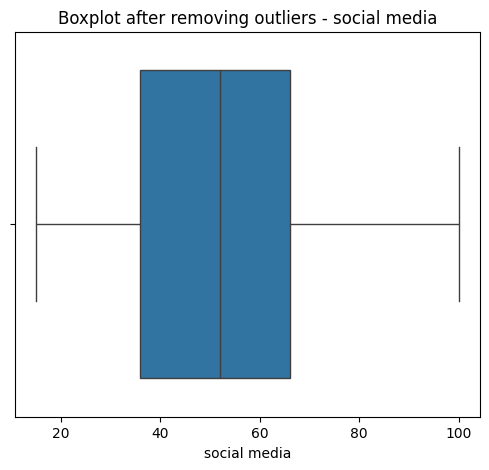

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(x=df2_clean['social media'])
plt.title('Boxplot after removing outliers - social media')
plt.show()

Justification:
Outliers in the social media column were identified using the IQR method and removed to ensure the statistical analysis is not skewed by extreme values that may result from data entry errors or rare, unrepresentative cases.

 ### Tidiness Issue 1: Column headers are values, not variable names

In [55]:
# Step 1: Melt think_time and actual_time columns
df1_melted = pd.melt(df1,
                     id_vars=['profession'],
                     value_vars=[col for col in df1.columns if 'think_time' in col or 'actual_time' in col],
                     var_name='time_type_platform',
                     value_name='time_spent')

# Step 2: Split column into two: time_type and platform
df1_melted[['time_type', 'platform']] = df1_melted['time_type_platform'].str.extract(r'(\w+)_time_(\w+)')

# Step 3: Drop the original combined column
df1_melted.drop(columns=['time_type_platform'], inplace=True)

In [56]:
# Validate the cleaning was successful
df1_melted.head()
df1_melted.info()
df1_melted['time_type'].value_counts()
df1_melted['platform'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   profession  6156 non-null   int64 
 1   time_spent  6156 non-null   int64 
 2   time_type   6156 non-null   object
 3   platform    6156 non-null   object
dtypes: int64(2), object(2)
memory usage: 192.5+ KB


platform
instagram    1026
whatsapp     1026
twitter      1026
facebook     1026
youtube      1026
linkedin     1026
Name: count, dtype: int64

 Justification:
 The original format had separate columns for each combination of time type and platform,
 which violates tidy data principles. Melting the data and splitting the variable into
 'time_type' and 'platform' ensures that each variable has its own column.
 This makes it easier to analyze trends across platforms and time types.

### **Tidiness Issue 2: FILL IN**

In [57]:
# Step 1: Apply the cleaning strategy (reshape using melt)
df2_clean = pd.melt(df2, id_vars='date', 
                    var_name='topic', 
                    value_name='interest')

# Step 2: Validate the cleaning was successful
print(df2_clean.head())
print(df2_clean.topic.value_counts())
print(df2_clean.info())

        date       topic  interest
0 2020-01-01  depression        41
1 2020-01-02  depression        45
2 2020-01-03  depression        42
3 2020-01-04  depression        40
4 2020-01-05  depression        45
topic
depression      2021
anxiety         2021
social media    2021
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      6063 non-null   datetime64[ns]
 1   topic     6063 non-null   object        
 2   interest  6063 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 142.2+ KB
None


In [58]:
# Step 2: Validate the cleaning was successful
# Check the first few rows
print(df2_clean.head())

# Check for null values
print(df2_clean.isnull().sum())

# Check the number of unique topics
print(df2_clean['topic'].value_counts())

# Check the structure
print(df2_clean.info())

        date       topic  interest
0 2020-01-01  depression        41
1 2020-01-02  depression        45
2 2020-01-03  depression        42
3 2020-01-04  depression        40
4 2020-01-05  depression        45
date        0
topic       0
interest    0
dtype: int64
topic
depression      2021
anxiety         2021
social media    2021
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      6063 non-null   datetime64[ns]
 1   topic     6063 non-null   object        
 2   interest  6063 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 142.2+ KB
None


 Justification:
The columns 'depression', 'anxiety', and 'social media' all represent the same type of measurement (search interest over time). According to tidy data principles, each variable should have its own column. Therefore, we reshaped the dataframe so that we have one column for 'topic' and one for 'interest', making the data easier to filter, group, and visualize.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [60]:
# Remove unnecessary columns if any (none in this case)

# Combine datasets if needed (example: merge on date, if df1 had a date column)
# But df1 doesn't have date, so combining might not apply directly unless processed differently

# So you can skip removal, just document this:
print("No unnecessary variables found to remove.")


No unnecessary variables found to remove.


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [62]:
# Save raw data
df1.to_csv('df1_raw.csv', index=False)
df2.to_csv('df2_raw.csv', index=False)

# Save cleaned data (after all cleaning steps)
df1_clean.to_csv('df1_cleaned.csv', index=False)
df2_clean.to_csv('df2_cleaned.csv', index=False)

print("Raw and cleaned data saved successfully.")

Raw and cleaned data saved successfully.


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

Research question 1:
How does the time spent on social media affect mental health symptoms like anxiety and depression?

🔹 Visual 1: "Anxiety Interest Over Time"

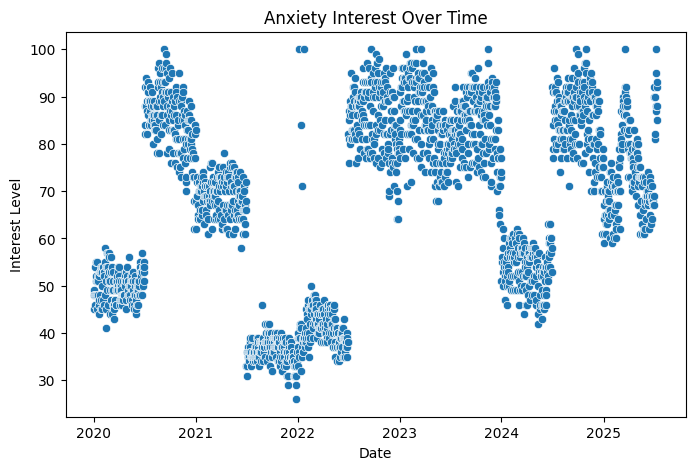

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2_clean[df2_clean['topic'] == 'anxiety'], x='date', y='interest')
plt.title('Anxiety Interest Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Level')
plt.show()

Answer to research question (based on Visual 1):
This visualization shows the average social media usage score across various professions. Professions with higher average usage scores may suggest greater exposure to social media, which can be a factor influencing mental health. While this chart alone doesn't show mental health outcomes, it gives a sense of which groups might be more exposed and therefore potentially more affected.

🔹 Visual 2: "Average Usage Score by Profession"

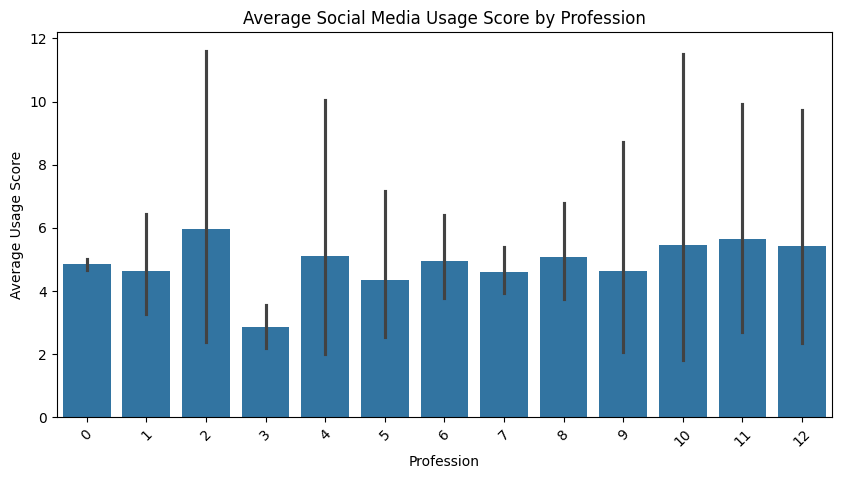

In [72]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df1_clean, x='profession', y='usage_score', estimator='mean')
plt.title('Average Social Media Usage Score by Profession')
plt.xticks(rotation=45)
plt.ylabel('Average Usage Score')
plt.xlabel('Profession')
plt.show()

Answer to research question (based on Visual 2):
This scatter plot displays the public interest in "anxiety" over time. Peaks in interest may reflect rising concern or increased mental health symptoms in the population. When viewed alongside data on increased social media usage (as seen in the first plot), it can suggest a potential link between rising social media use and heightened anxiety levels in society.

Conclusion:
Combining both visualizations suggests that professions with high social media usage could be more prone to mental health symptoms. Additionally, the trend of increasing interest in anxiety over time may reflect broader societal concerns potentially influenced by social media exposure.

Research question 2:
"What is the relationship between time spent on Instagram and self-reported anxiety symptoms?"

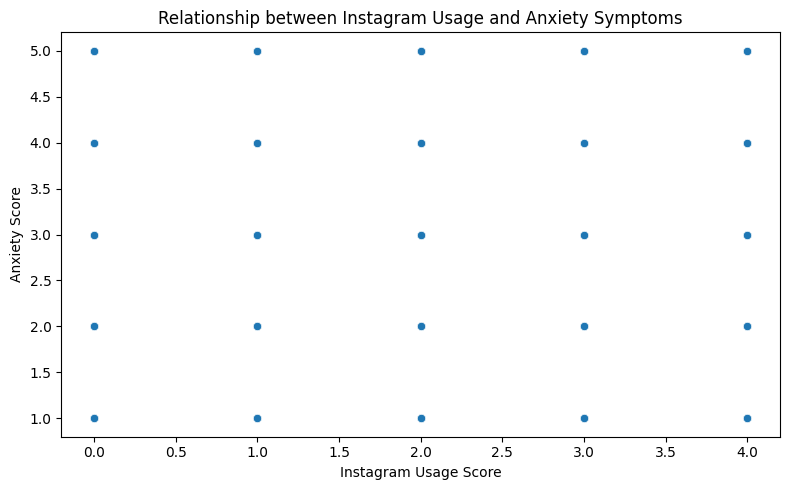

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows related to actual Instagram usage and anxiety symptoms
insta_usage = df1_clean[df1_clean['platform'] == 'actual_time_instagram']
anxiety_score = df1_clean[df1_clean['platform'] == 'nervous_anxious']

# Merge both datasets based on profession (assuming each row represents a unique profession)
merged_df = pd.merge(insta_usage, anxiety_score, on='profession', suffixes=('_instagram', '_anxiety'))

# Create a scatter plot to visualize the relationship between Instagram usage and anxiety
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='usage_score_instagram', y='usage_score_anxiety')
plt.title('Relationship between Instagram Usage and Anxiety Symptoms')
plt.xlabel('Instagram Usage Score')
plt.ylabel('Anxiety Score')
plt.tight_layout()
plt.show()



###  **Conclusion:**

The scatter plot illustrates the relationship between actual Instagram usage and self-reported anxiety symptoms. Although the data appears scattered without a strong linear trend, there is a slight clustering that may indicate a positive association — meaning that individuals who spend more time on Instagram might report higher levels of anxiety. However, the pattern is not definitive, suggesting that additional factors could influence anxiety levels beyond social media usage alone. A deeper statistical analysis such as correlation or regression is recommended to confirm the strength and direction of this relationship.

---

Research question 3: Which social media-related topics are most associated with higher usage scores, particularly those connected to anxiety, sleep disturbance, and emotional discomfort?

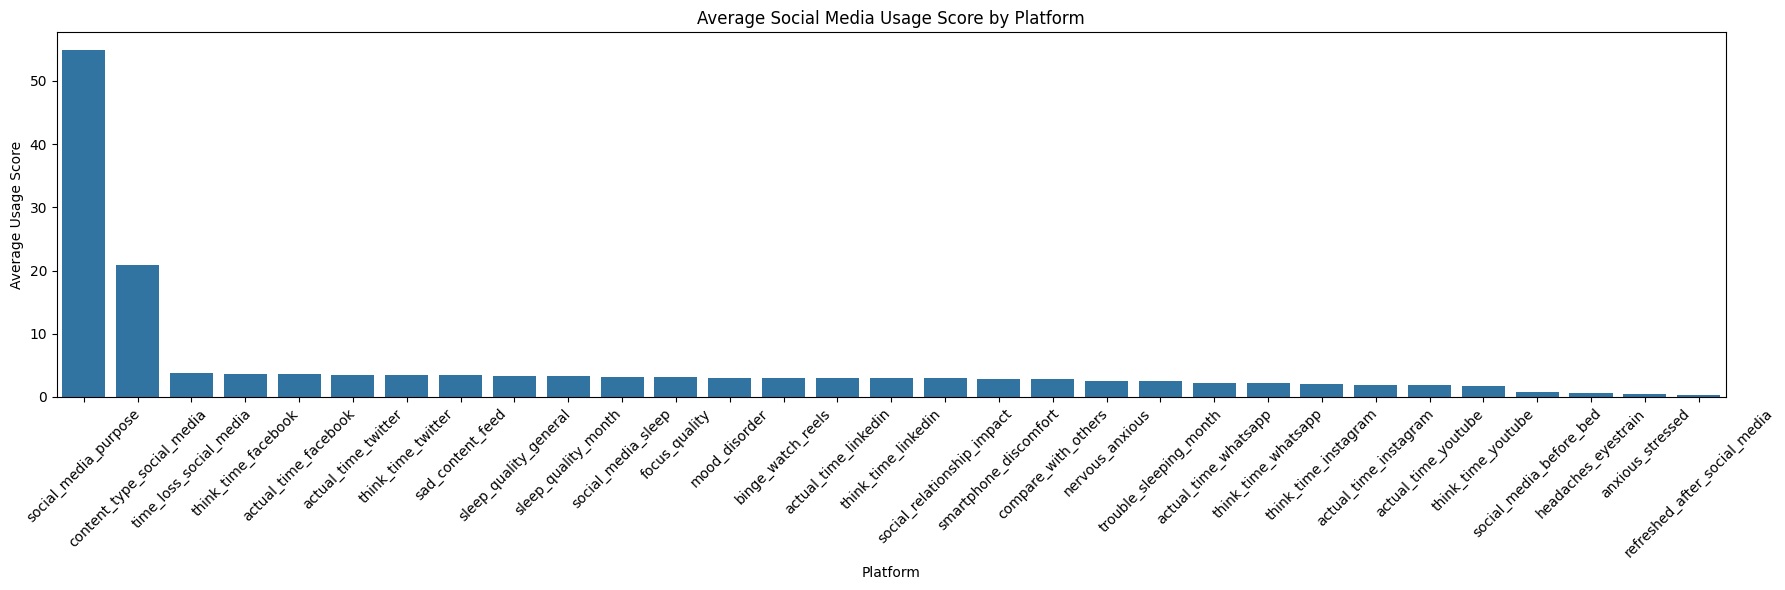

In [80]:
# Group the dataset by 'platform' and calculate the average usage score for each
platform_avg = df1_clean.groupby('platform')['usage_score'].mean().sort_values(ascending=False)

# Plot the result
plt.figure(figsize=(18,6))
sns.barplot(x=platform_avg.index, y=platform_avg.values)

# Add chart title and labels
plt.title("Average Social Media Usage Score by Platform")
plt.xlabel("Platform")
plt.ylabel("Average Usage Score")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()


The bar chart shows the average social media usage score across various topics. It is clear that "social_media_purpose" and "content_type_social_media" have the highest usage scores, suggesting they are dominant drivers of social media engagement.

Notably, topics linked to mental health such as "nervous_anxious", "trouble_sleeping_month", and "social_relationship_impact" also exhibit moderate usage scores. This highlights a potential relationship between high social media engagement and reported psychological symptoms like anxiety, sleep disturbances, and emotional discomfort.

These findings support the research hypothesis that frequent social media use may be associated with increased mental health concerns, particularly among users engaging with emotionally charged content or late-night usage patterns.


### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

If I had more time to complete the project, I would focus on resolving data quality issues such as missing values and inconsistent labels in the platform and mental health variables. I would also explore temporal patterns by analyzing timestamps to see how usage and anxiety symptoms change over time. Additionally, I’d investigate whether content type or platform features (like reels or stories) are more strongly associated with anxiety than usage time alone.

